# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
total_data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [2]:
# Reconstructing the data set into a time series

total_data['date'] = pd.to_datetime(total_data.date)
total_data = total_data.set_index('date')
time_series_df = total_data['sales']
time_series_df.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

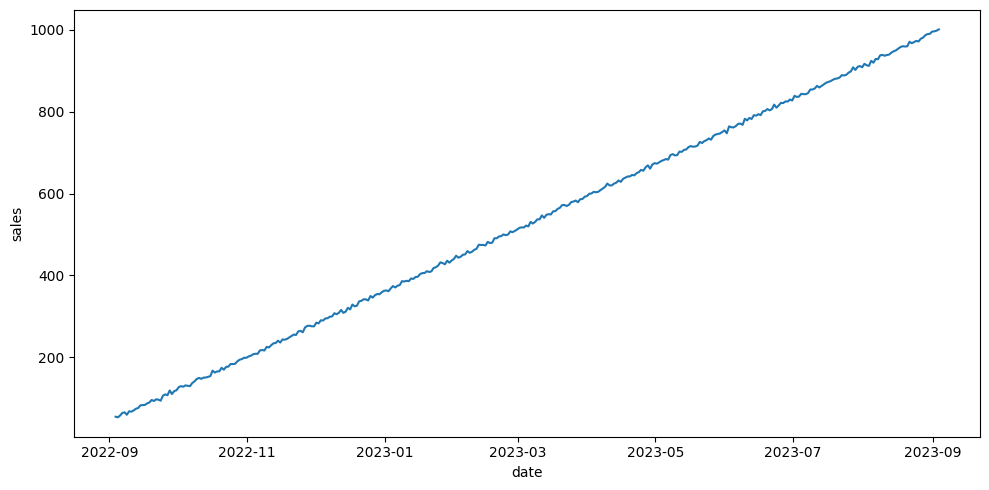

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series_df)

plt.tight_layout()

plt.show()

Q: What is the tensor in the time series?

Graphically the tensor is represented in increments of 2 months and the dataset itself appeears to track its data monthly.

Q: What is the trend?

The time series follows a smooth linear function, with each date the sales increases at a constant rate, with a relatively minimal variance.

Q: Is it stationary?

Being as the plot is continually increasing along the y-axis (sales increasing), this time series would not be considered stationary.

In [4]:
# Running a Dickey-Fuller test to inspect the stationarity of the time series

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Results from the Dickey-Fuller test:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(time_series_df)

Results from the Dickey-Fuller test:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Noting that the p-value generated a value of 0.986, the series is not stationary, and we can work with this time series making a transformation.

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(time_series_df)
decomposition

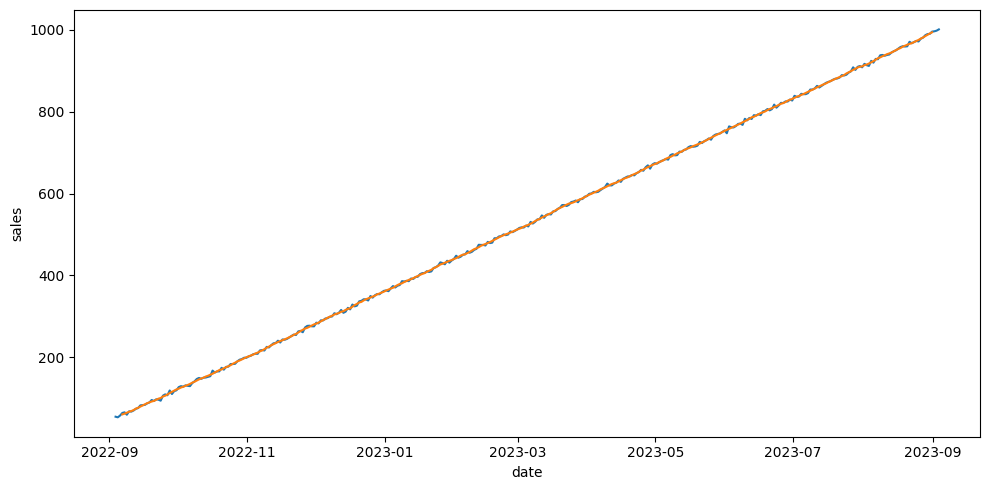

In [6]:
# Assessing the trend

trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series_df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

In [7]:
time_series_df

date
2022-09-03 17:10:08.079328      55.292157
2022-09-04 17:10:08.079328      53.803211
2022-09-05 17:10:08.079328      58.141693
2022-09-06 17:10:08.079328      64.530899
2022-09-07 17:10:08.079328      66.013633
                                 ...     
2023-08-30 17:10:08.079328     989.600354
2023-08-31 17:10:08.079328     994.987326
2023-09-01 17:10:08.079328     995.814415
2023-09-02 17:10:08.079328     997.350214
2023-09-03 17:10:08.079328    1000.482785
Name: sales, Length: 366, dtype: float64

In [8]:
trend_mod = trend.dropna()

In [9]:
ts_stationary = time_series_df - trend_mod

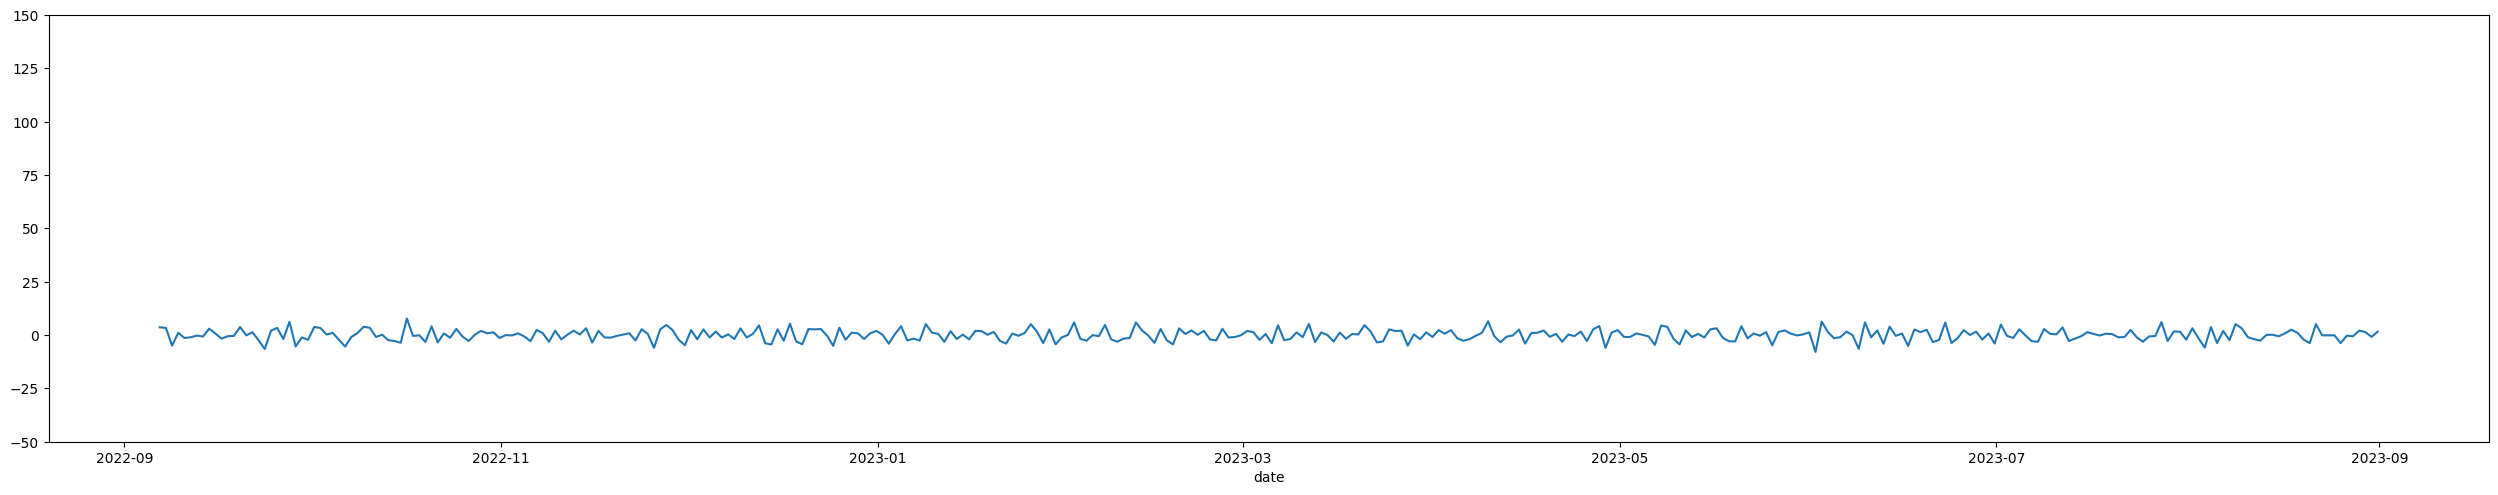

In [10]:
fig, axis = plt.subplots(figsize = (25, 5))

sns.lineplot(data = ts_stationary)

plt.tight_layout()
plt.yticks([-50, -25, 0, 25, 50, 75, 100, 125, 150])
plt.show()

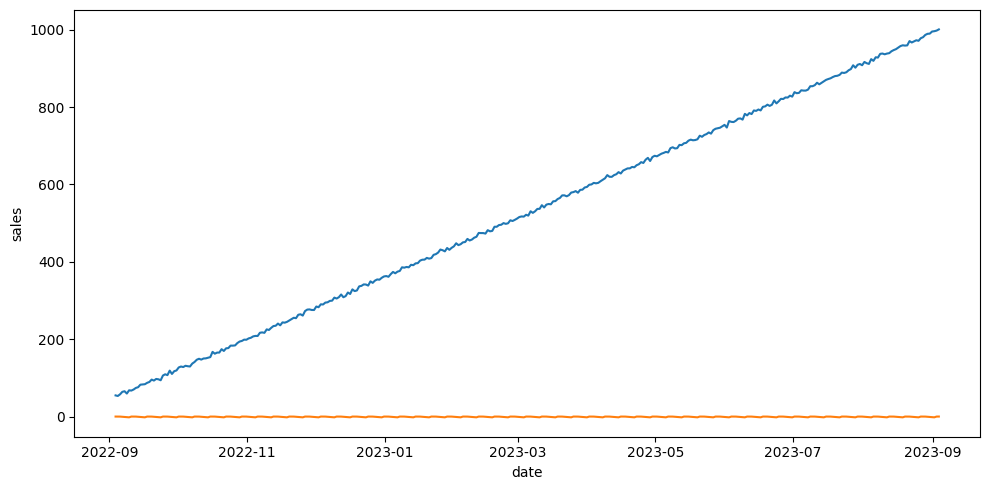

In [11]:
# Assessing the seasonality

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series_df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

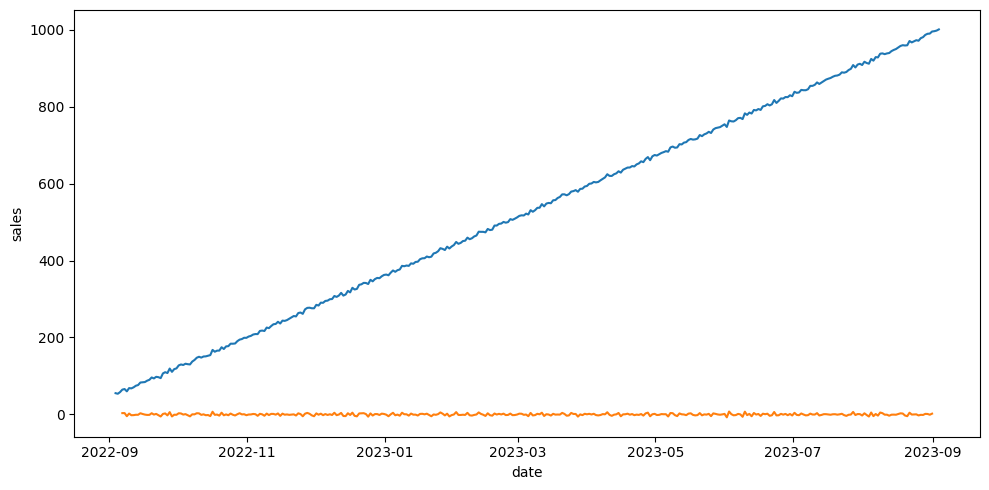

In [12]:
# Assessing the variability of the time series

residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series_df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

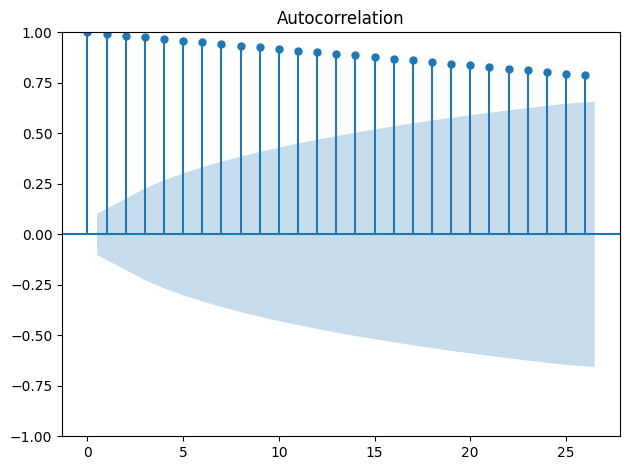

In [13]:
# Assessing the autocorrelation

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(time_series_df)

plt.tight_layout()

plt.show()

In [14]:
from pmdarima import auto_arima

model = auto_arima((time_series_df), seasonal = False, trace = True, m = 7)

/home/vscode/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.172 seconds


In [15]:
forecast = model.predict(100)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831669
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
                                 ...     
2023-12-08 17:10:08.079328    1249.022047
2023-12-09 17:10:08.079328    1251.619878
2023-12-10 17:10:08.079328    1254.217709
2023-12-11 17:10:08.079328    1256.815540
2023-12-12 17:10:08.079328    1259.413371
Freq: D, Length: 100, dtype: float64

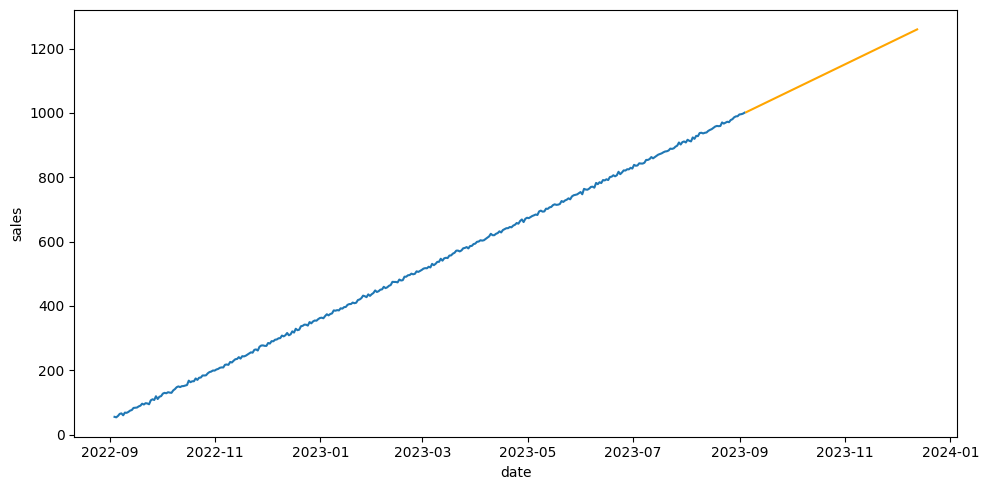

In [16]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series_df)
sns.lineplot(data = forecast, c = "orange")

plt.tight_layout()

plt.show()

In [17]:
ts_stationary.isnull().sum()
ts_stationary = ts_stationary.diff().dropna()

In [18]:
from pmdarima import auto_arima

stationary_model = auto_arima((ts_stationary), seasonal = False, trace = True, m = 7)

/home/vscode/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2060.797, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1937.952, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1895.411, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1849.561, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1814.857, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1802.085, Time=0.06 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.99 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1804.085, Time=0.12 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 2.390 seconds


In [19]:
stationary_forecast = stationary_model.predict(100)
stationary_forecast

2023-09-01 17:10:08.079328   -1.230812e+00
2023-09-02 17:10:08.079328    5.565788e-01
2023-09-03 17:10:08.079328   -1.016281e-01
2023-09-04 17:10:08.079328   -2.586853e-01
2023-09-05 17:10:08.079328    4.232090e-02
                                  ...     
2023-12-05 17:10:08.079328    2.429191e-10
2023-12-06 17:10:08.079328    5.022947e-11
2023-12-07 17:10:08.079328   -1.313888e-10
2023-12-08 17:10:08.079328   -9.758153e-11
2023-12-09 17:10:08.079328    3.609379e-11
Freq: D, Length: 100, dtype: float64

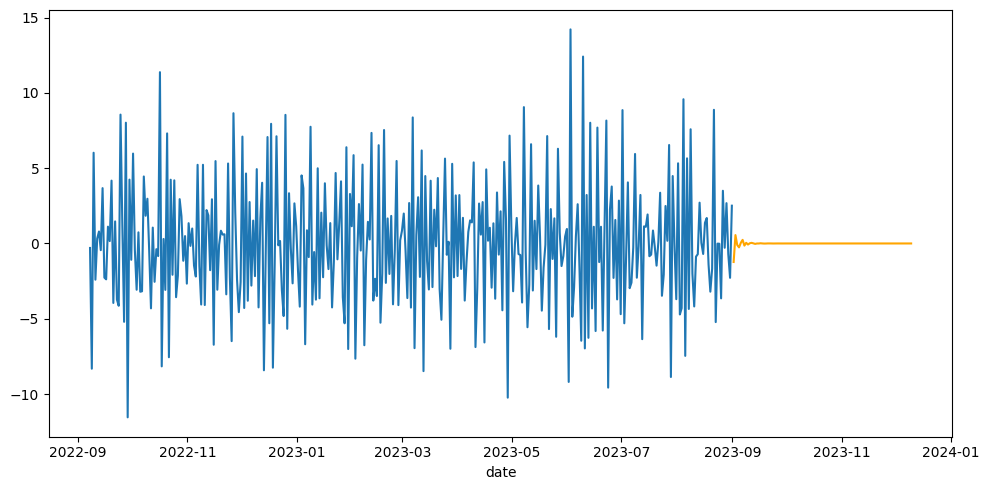

In [22]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = stationary_forecast, c = "orange")

plt.tight_layout()

plt.show()


Step 4: Predict with the test set
Now use the trained model with the test set and compare the points with the real ones. Measure the performance of the time series.

📝 Instructions

Sales forecasting system
We want to set up our company's warehouse in another location and we need to estimate the rate of sales, which has been increasing since the company's creation, for the next few months in order to provide the space we will need.